# Data Visualization and Statistical Analysis

This Jupyter Notebook will comprise of prediction of a particular stock price, by comparing it with other stocks of S&P500 companies spread across various sectors and industries, with the help of statistical metrics to understand the relationship between them.

In [8]:
#Importing Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

**Stock Price Generation** 
Following companies Stock prices are being generated:

1. Electronics Arts(EA) Industry: Communication Services, Sub-Industry- Interactive Home Entertainment
2. LOWE'S(LOW) Industry: Consumer Discretionary, Sub-Industry- Home Improvement Retail
3. Domino's (DPZ) Industry: Consumer Discretionary, Sub-Industry- Restaurants
4. Apple (APPL) Industry: Information Technology, Sub-Industry- Technology Hardware, Storage & Peripherals
5. Coca-Cola(KO) Industry: Consumer Staples, Sub-Industry- Soft Drinks

In [9]:
#Generating Stock Price Data 
symbols = ['EA', 'LOW', 'DPZ', 'AAPL', 'KO']
start = '2018-01-01'
end = '2022-01-01'
df = yf.download(symbols, start, end)['Adj Close']

[*********************100%***********************]  5 of 5 completed


**Data Visualization**

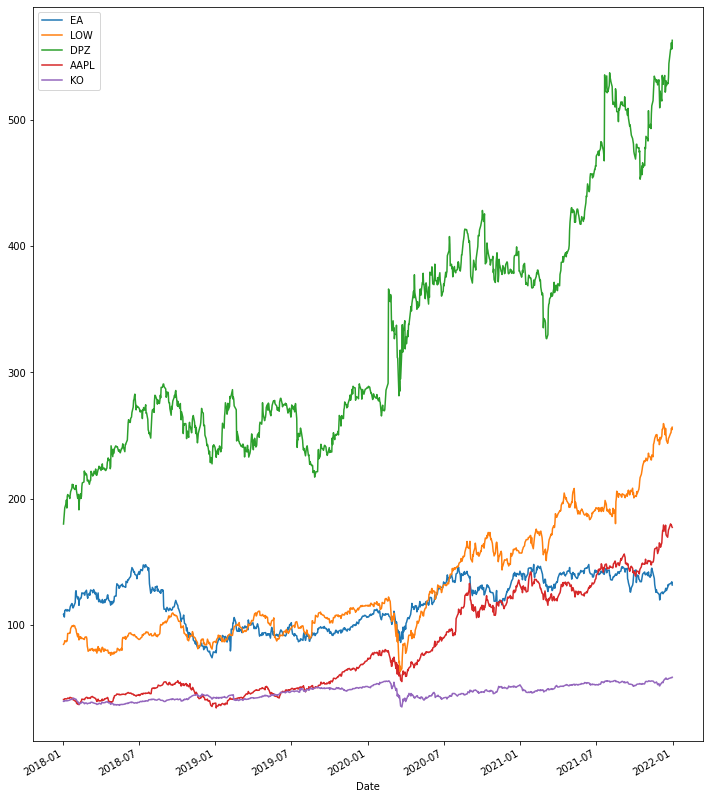

In [10]:
#Plotting Stock prices
for s in symbols:
    df[s].plot(label = s, figsize = (12, 15))
plt.legend()

In [11]:
df.head()

,AAPL,DPZ,EA,KO,LOW
Date,,,,,
2018-01-02,41.135750,179.984314,108.616753,39.689281,84.823463
2018-01-03,41.128590,184.528687,108.914467,39.602127,85.193794
2018-01-04,41.319630,189.949203,106.373955,40.159908,85.860397
2018-01-05,41.790062,192.847198,111.534378,40.151196,87.712013
2018-01-08,41.634850,196.034073,112.358055,40.090187,86.758446


**Correlation Analysis**:
Correlation Analysis is important because it help us to predict which stocks are going to trend positively/negatively together, and which stocks will not, which will eventually help our portfolio to become risk averse to losses.

1. ClusterMap

<Figure size 864x720 with 0 Axes>

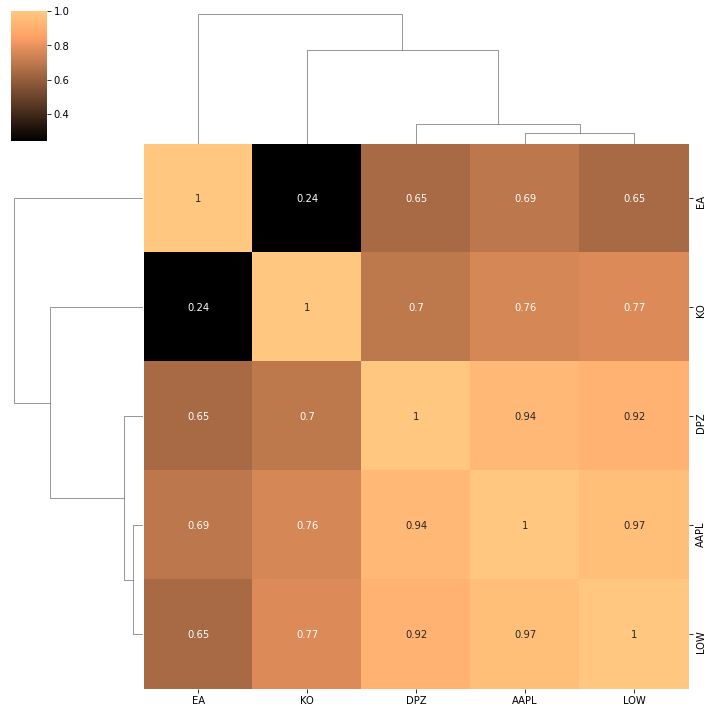

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,10))
sns.clustermap(df.corr(), cmap = 'copper', annot = True)

2. Pairplot

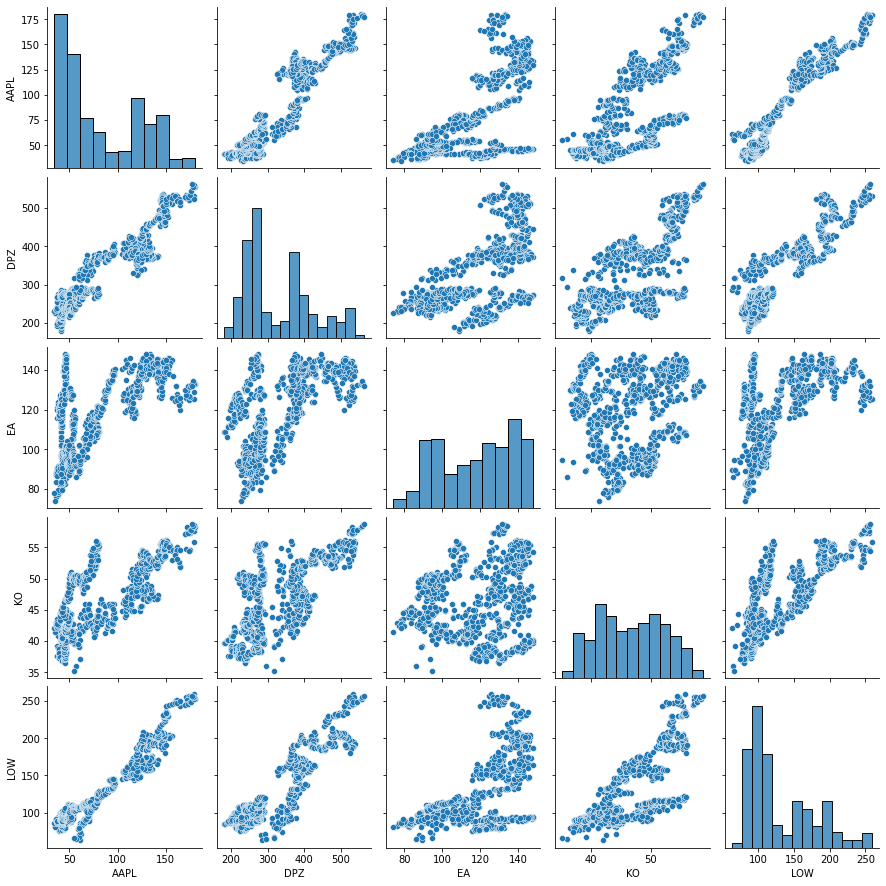

In [13]:
sns.pairplot(df, kind="scatter")
plt.show()

In [14]:
returns = (df.pct_change().dropna())
returns

,AAPL,DPZ,EA,KO,LOW
Date,,,,,
2018-01-03,-0.000174,0.025249,0.002741,-0.002196,0.004366
2018-01-04,0.004645,0.029375,-0.023326,0.014085,0.007825
2018-01-05,0.011385,0.015257,0.048512,-0.000217,0.021565
2018-01-08,-0.003714,0.016525,0.007385,-0.001519,-0.010872
2018-01-09,-0.000115,0.015225,-0.009186,0.005000,0.008964
...,...,...,...,...,...
2021-12-27,0.022975,0.020830,0.003772,0.007386,0.014435
2021-12-28,-0.005767,0.001005,0.003232,0.003922,0.001261
2021-12-29,0.000502,0.008301,-0.002472,0.001189,0.013975


Correlation Matrix Visualization of Daily Stock returns

<Figure size 864x720 with 0 Axes>

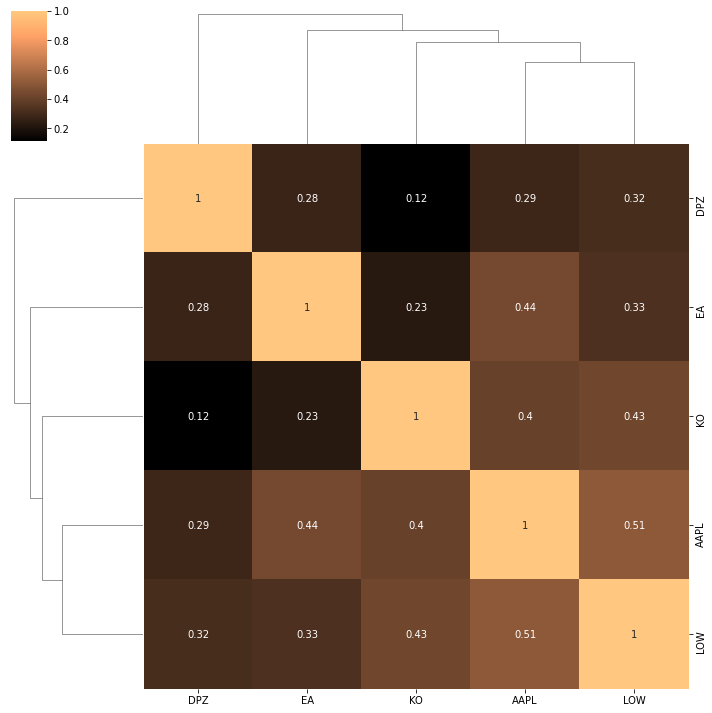

In [15]:
plt.figure(figsize = (12,10))
sns.clustermap(returns.corr(), cmap = 'copper', annot = True)

Downloading the data of Standard & Poor 500 index

In [16]:
#Generating Benchmark Data
Benchmark_Data = yf.download('SPY', start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [17]:
#Daily Returns
Benchmark_returns = Benchmark_Data.pct_change().dropna()

In [18]:
#Average Return of Stock
Mean_Returns = returns.mean()
Mean_Returns

AAPL    0.001667
DPZ     0.001334
EA      0.000406
KO      0.000487
LOW     0.001338
dtype: float64

In [19]:
#Monthly Returns
def monthly_returns(ticker):
    monthly = df[ticker].asfreq('BM')
    monthly['Returns'] = df[ticker].pct_change().dropna()
    return monthly

In [20]:
AAPL_monthly = monthly_returns('AAPL')
AAPL_monthly

Date
2018-01-31 00:00:00                                              39.9823
2018-02-28 00:00:00                                              42.7085
2018-03-30 00:00:00                                                  NaN
2018-04-30 00:00:00                                              39.6251
2018-05-31 00:00:00                                              44.9793
2018-06-29 00:00:00                                              44.5557
2018-07-31 00:00:00                                              45.8025
2018-08-31 00:00:00                                              54.9824
2018-09-28 00:00:00                                              54.5259
2018-10-31 00:00:00                                               52.864
2018-11-30 00:00:00                                              43.2852
2018-12-31 00:00:00                                              38.2339
2019-01-31 00:00:00                                              40.3426
2019-02-28 00:00:00                           

In [21]:
returns

,AAPL,DPZ,EA,KO,LOW
Date,,,,,
2018-01-03,-0.000174,0.025249,0.002741,-0.002196,0.004366
2018-01-04,0.004645,0.029375,-0.023326,0.014085,0.007825
2018-01-05,0.011385,0.015257,0.048512,-0.000217,0.021565
2018-01-08,-0.003714,0.016525,0.007385,-0.001519,-0.010872
2018-01-09,-0.000115,0.015225,-0.009186,0.005000,0.008964
...,...,...,...,...,...
2021-12-27,0.022975,0.020830,0.003772,0.007386,0.014435
2021-12-28,-0.005767,0.001005,0.003232,0.003922,0.001261
2021-12-29,0.000502,0.008301,-0.002472,0.001189,0.013975


**Sample Portfolio Return:**

In [22]:
weights = [0.30, 0.30, 0.10, 0.15, 0.15]
weighted_return = (weights*returns)
weighted_return

,AAPL,DPZ,EA,KO,LOW
Date,,,,,
2018-01-03,-0.000052,0.007575,0.000274,-0.000329,0.000655
2018-01-04,0.001393,0.008812,-0.002333,0.002113,0.001174
2018-01-05,0.003416,0.004577,0.004851,-0.000033,0.003235
2018-01-08,-0.001114,0.004958,0.000738,-0.000228,-0.001631
2018-01-09,-0.000034,0.004568,-0.000919,0.000750,0.001345
...,...,...,...,...,...
2021-12-27,0.006892,0.006249,0.000377,0.001108,0.002165
2021-12-28,-0.001730,0.000302,0.000323,0.000588,0.000189
2021-12-29,0.000151,0.002490,-0.000247,0.000178,0.002096


In [23]:
port_ret = weighted_return.sum(axis = 1)
port_ret

Date
2018-01-03    0.008122
2018-01-04    0.011160
2018-01-05    0.016046
2018-01-08    0.002723
2018-01-09    0.005709
                ...   
2021-12-27    0.016792
2021-12-28   -0.000328
2021-12-29    0.004668
2021-12-30   -0.004764
2021-12-31    0.003080
Length: 1007, dtype: float64

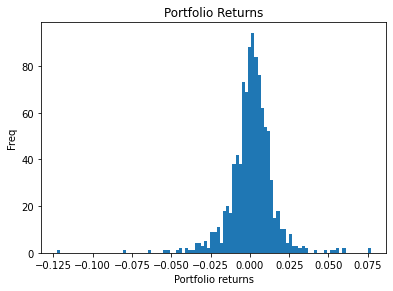

In [24]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret, bins = 100)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Portfolio Returns")
plt.show()

**Statistical Calculations**
Statisticals measures reveals alot about about a Corporation's financial health and it's stock performance.
The following measures will be calculated:


In [25]:
from scipy import stats
def statistics(ticker):    
    beta, alpha, r_value, p_value, std_err = stats.linregress(Benchmark_returns, returns[ticker])
    print(ticker, ":stats")
    print("Beta=", beta)
    print("Alpha=", alpha)
    print("R-squared=", r_value**2)
    print("p-value =", p_value)
    print("                   ")

In [26]:
for i in df.columns:
    statistics(i)

AAPL :stats
Beta= 1.2272630824156932
Alpha= 0.000781949031938849
R-squared= 0.6036891499475161
p-value = 3.33526831849209e-204
                   
DPZ :stats
Beta= 0.49334373586197144
Alpha= 0.000977838029068466
R-squared= 0.1014648048256514
p-value = 3.5094300822801096e-25
                   
EA :stats
Beta= 0.7285064380193598
Alpha= -0.00011949790890717672
R-squared= 0.21277497619022354
p-value = 3.3488834973194423e-54
                   
KO :stats
Beta= 0.7107301771317948
Alpha= -2.5601001341315284e-05
R-squared= 0.45025301906096293
p-value = 1.0123468269463534e-132
                   
LOW :stats
Beta= 1.1508157551906022
Alpha= 0.0005080816761580215
R-squared= 0.4907786906015007
p-value = 1.8854320327031769e-149
                   


In [27]:
import scipy.stats as scs
def adj_close_statistics(df):
    sta = scs.describe(df)
    print(i)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))
    print("                   ")
    
for i in df.columns:
    adj_close_statistics(df[i])

AAPL
     statistic           value
------------------------------
          size      1008.00000
           min        34.46480
           max       180.10054
          mean        82.85430
           std        40.79152
          skew         0.57557
      kurtosis        -1.14967
                   
DPZ
     statistic           value
------------------------------
          size      1008.00000
           min       179.98431
           max       562.72339
          mean       329.01599
           std        92.66287
          skew         0.66963
      kurtosis        -0.62377
                   
EA
     statistic           value
------------------------------
          size      1008.00000
           min        74.15115
           max       148.03288
          mean       117.95038
           std        19.55204
          skew        -0.23226
      kurtosis        -1.28345
                   
KO
     statistic           value
------------------------------
          size      1008.0

In [28]:
#Risk
returns.std()

AAPL    0.020710
DPZ     0.020307
EA      0.020707
KO      0.013888
LOW     0.021538
dtype: float64

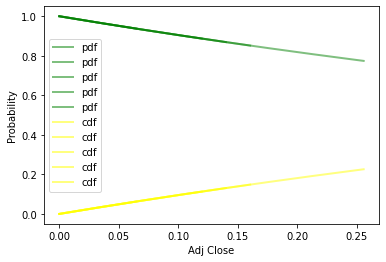

In [29]:
from scipy.stats import expon

mu = returns.mean()
sigma = returns.std()

x_m = returns.max()

def plot_exponential(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    if cdf:
        y = expon.cdf(x, mu, sigma)
    else:
        y = expon.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)
    

x = np.linspace(0, x_m, 5000)
plot_exponential(x, 0, 1, color='green', lw=2, ls='-', alpha=0.5, label='pdf')
plot_exponential(x, 0, 1, cdf=True, color='yellow', lw=2, ls='-', alpha=0.5, label='cdf')
plt.xlabel('Adj Close')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.show()

**Augmented Dickey Fuller Test**

In [30]:
from statsmodels.tsa.stattools import adfuller
def Augmented_Dickey_Fuller_test(data):
    print('Results of Augmented Dickey-Fuller Test:', i)
    test = adfuller(data, autolag='AIC')
    output = pd.Series(test[0:4], index=['open','high','10_day_volatility', '50_day_moving_avg'])
    for key, value in test[4].items():
        output['Critical Value (%s)'%key] = value
    print(output)
    print("      ")

In [31]:
for i in df.columns:
    Augmented_Dickey_Fuller_test(df[i])

Results of Augmented Dickey-Fuller Test: AAPL
open                       1.089360
high                       0.995125
10_day_volatility          1.000000
50_day_moving_avg       1006.000000
Critical Value (1%)       -3.436867
Critical Value (5%)       -2.864417
Critical Value (10%)      -2.568302
dtype: float64
      
Results of Augmented Dickey-Fuller Test: DPZ
open                      0.248500
high                      0.974854
10_day_volatility         8.000000
50_day_moving_avg       999.000000
Critical Value (1%)      -3.436913
Critical Value (5%)      -2.864437
Critical Value (10%)     -2.568313
dtype: float64
      
Results of Augmented Dickey-Fuller Test: EA
open                      -1.699348
high                       0.431448
10_day_volatility          1.000000
50_day_moving_avg       1006.000000
Critical Value (1%)       -3.436867
Critical Value (5%)       -2.864417
Critical Value (10%)      -2.568302
dtype: float64
      
Results of Augmented Dickey-Fuller Test: KO
open  

In [32]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  
df_log = np.log(df)
df_log_diff = df_log - df_log.shift()
df_log_diff.dropna(inplace=True)
def ACF_PACF_Plot(df, df_log, df_log_diff):
    lag_acf = acf(df_log_diff, nlags=20)
    lag_pacf = pacf(df_log_diff, nlags=20, method='ols')

    #Plot ACF:
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')

    #Plot PACF:
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()

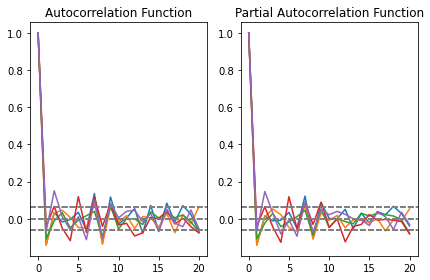

In [33]:
for i in df.columns:
    ACF_PACF_Plot(df[i], df_log[i], df_log_diff[i])